# 向量测量

## 1. 向量乘法

向量相乘有两种方法: **点积** ($u \cdot v$) 和**向量积** ($u \times v$)

对于数 (标量) 来说, 这两种运算含义相同, 但对于向量来说, 这两种运算的含义完全不同:
- 点积取两个向量并返回一个数 (标量)
- 向量积取两个向量并返回一个新向量

点积和向量积都可以推断出三维空间中向量的长度和方向

In [53]:
try:
    import sys
    # 将项目根路径加入系统路径集合, 即可以引入相关的包
    sys.path.append("../..")
finally:
    pass

# 引入所需的包
import random
from common import Number, Vector, Vector2D
from common.vector import scale, length, to_radian, to_degree, to_cartesian, to_polar
from common.vector_draw import (
    Color,
    draw, Points, Arrow,
    draw3d, Points3D, Arrow3D, Segment3D, Box3D,
)
from math import sqrt, sin, cos, acos, pi


### 1.1. 点积

点积 (也叫内积) 是对两个向量的运算, 返回一个标量.

换句话说给定两个向量 $u$ 和 $v$, 那么 $u \cdot v$ 的结果是实数.

点积适用于二维, 三维等任意维度的向量. 它可以被看作测量输入向量对的 **对齐程度**.

**知识**: 计算两个向量的点积

In [54]:
def dot(u: Vector, v: Vector) -> float:
    return sum([coord1 * coord2 for coord1, coord2 in zip(u, v)])


In [55]:
# 定义两个二维向量
u, v = (1, 1), (2, 2)

# 对两个向量进行点积计算
r = dot(u, v)

# 输出计算结果
r


4

**知识:** 大致对齐的两个向量给出一个大的正点积

指向相似方向的两个向量的点积为正, 并且向量越大, 乘积就越大

20.41


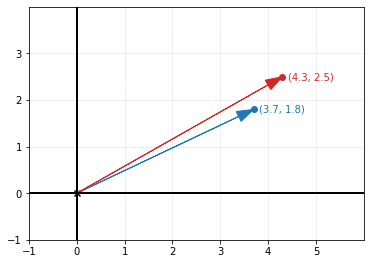

In [56]:
# 定义两个向量
u, v = (3.7, 1.8), (4.3, 2.5)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
)


27.01


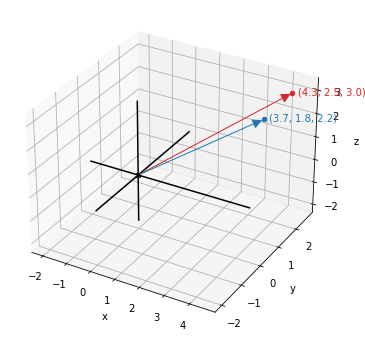

In [57]:
# 定义两个向量
u, v = (3.7, 1.8, 2.2), (4.3, 2.5, 3.0)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


指向相似方向的两个较短向量, 点积较小但仍为正

3.9299999999999997


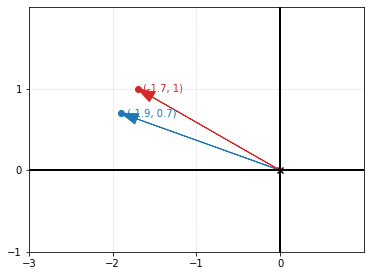

In [58]:
# 定义两个向量
u, v = (-1.9, 0.7), (-1.7, 1)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
)


6.33


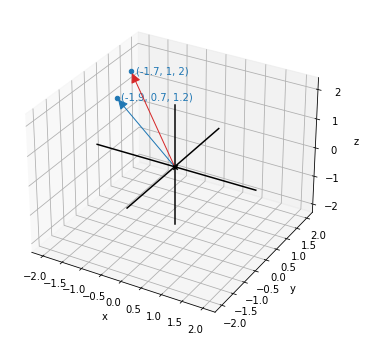

In [59]:
# 定义两个向量
u, v = (-1.9, 0.7, 1.2), (-1.7, 1, 2)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.blue),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


**知识:** 点积为负数的两个向量方向相反

如果两个向量指向相反或大致相反的方向, 则其点积为负

向量越长, 则点积的负值越小

-11.700000000000001


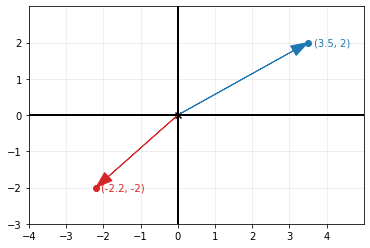

In [60]:
# 定义两个向量
u, v = (3.5, 2), (-2.2, -2)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
)


-14.22


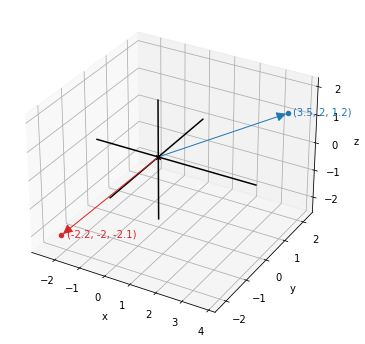

In [61]:
# 定义两个向量
u, v = (3.5, 2, 1.2), (-2.2, -2, -2.1)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


指向相反方向的较短向量, 点积较大但仍为负数

-2.4


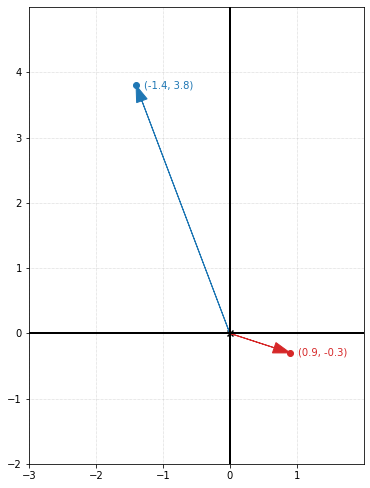

In [62]:
# 定义两个向量
u, v = (-1.4, 3.8), (0.9, -0.3)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
)


-2.88


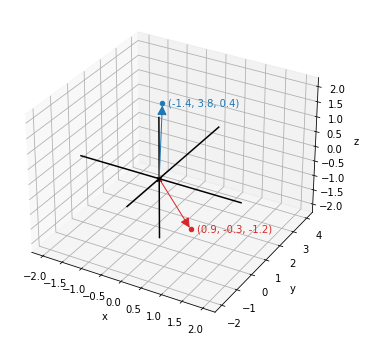

In [63]:
# 定义两个向量
u, v = (-1.4, 3.8, 0.4), (0.9, -0.3, -1.2)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


**知识:** 点积为 `0` 的两个向量相互垂直

如果两个向量的方向完全垂直, 那么无论它们的长度如何, 点积都是零

这是点积最重要的应用之一: 
- 在不做任何三角运算的情况下, 计算两个向量是否垂直
- 如果两个向量的夹角小于 `90°`, 则向量的点积为正
- 如果夹角大于 `90°`, 则向量的点积为负

0.0


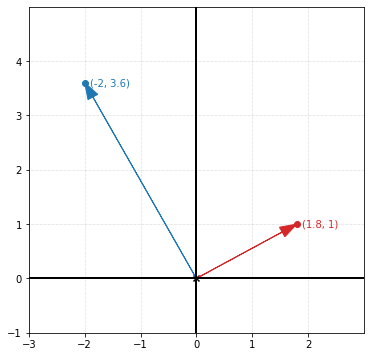

In [64]:
# 定义两个向量
u, v = (-2, 3.6), (1.8, 1)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
)


1.7763568394002505e-15


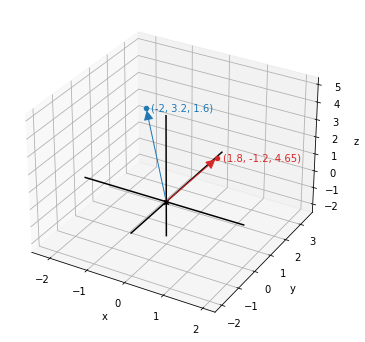

In [65]:
# 定义两个向量
u, v = (-2, 3.2, 1.6), (1.8, -1.2, 4.65)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


**练习:** 位于不同轴上的两个向量的点积为零, 说明它们是互相垂直的

对于 `(1, 0)` 和 `(0, 2)` 的点积, 点积结果为 `0`, 说明这两个向量相互垂直

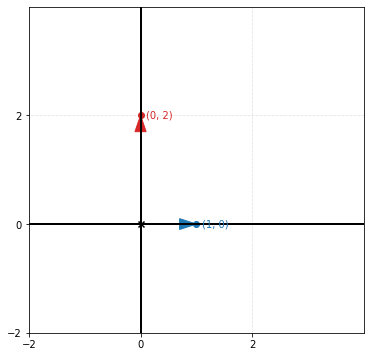

In [66]:
# 定义两个二维向量
u, v = (1, 0), (0, 2)
# 计算二维向量的点积
r = dot(u, v)

# 绘制相互垂直的二维向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
    grid=(2, 2)
)


对于 `(0, 3, 0)` 和 `(0, 0, -5)` 的点积, 点积结果为 `0`, 说明这两个向量相互垂直

三维空间的向量垂直很难直接从坐标系上观察到, 用点积可以更容易得到结论

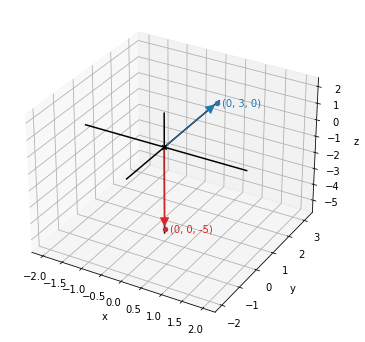

In [67]:
# 定义两个三维向量
u, v = (0, 3, 0), (0, 0, -5)
# 计算三维向量的点积
r = dot(u, v)

# 绘制相互垂直的三维向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


**练习:** `(-1, -1, 1)` 和 `(1, 2, 1)` 的点积是多少? 这两个三维向量的夹角是大于 `90°`, 小于 `90°`, 还是正好等于 `90°`?

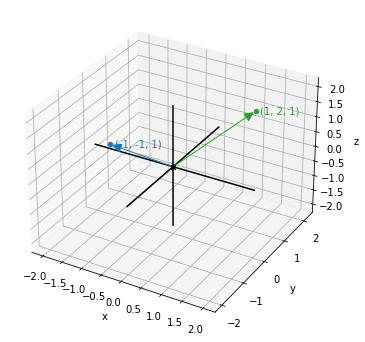

dot(u, v)=-2


In [68]:
u, v = (-1, -1, 1), (1, 2, 1)

draw3d(
    Points3D(u, color=Color.blue),
    Arrow3D(u, color=Color.blue),
    Points3D(v, color=Color.green),
    Arrow3D(v, color=Color.green),
)

r = dot(u, v)
print(f"dot(u, v)={r}")

# 点积结果为 -2, 为负数, 说明两个向量方向相反, 大于 90°


**练习:** 向量越长, 其点积的绝对值越大

对于二维向量 `(3, 4)` 和 `(2, 3)`, 将其任意一个向量放大 `2` 倍, 测量其点积的变化

In [69]:
# 定义两个二维向量
u, v = (3, 4), (2, 3)

# 计算原始点积
r1 = dot(u, v)
print(r1)

# 将 u 向量放大 2 倍, 检查点积是否也放大 2 倍
r2 = dot(scale(u, 2), v)
print(r2)

# 将 v 向量放大 2 倍, 检查点积是否也放大 2 倍
r3 = dot(u, scale(v, 2))
print(r3)


18
36
36


对于三维向量 `(3, 4, 5)` 和 `(2, 3, 4)`, 将其任意一个向量放大 `2` 倍, 测量其点积的变化

In [70]:
# 定义两个三维向量
u, v = (3, 4, 5), (2, 3, 4)

# 计算原始点积
r1 = dot(u, v)
print(r1)

# 将 u 向量放大 2 倍, 检查点积是否也放大 2 倍
r2 = dot(scale(u, 2), v)
print(r2)

# 将 v 向量放大 2 倍, 检查点积是否也放大 2 倍
r3 = dot(u, scale(v, 2))
print(r3)


38
76
76


**练习:** 对于两个三维向量 $u$ 和 $v$, $(2u) \cdot v$ 和 $u \cdot (2v)$ 的值都等于 $2(u \cdot v)$. 在这种情况下, $u \cdot v=18$, 而 $(2u) \cdot v$ 和 $u \cdot (2v)$ 都是 `36`, 是原结果的 `2` 倍. 请证明这个规则对于任意实数 $s$ 都适用, 而不仅仅是 `2`. 换句话说, 请证明对于任意 $s$, $(su) \cdot v$ 和 $u \cdot (sv)$ 的值都等于 $s(u \cdot v)$

**解:** 设 $u$ 和 $v$ 的坐标为 $u=(a,b,c)$ 和 $v=(d,e,f)$, 那么 $u \cdot v=ad + be + cf$. 因为 $su=(sa, sb, sc)$, $sv=(sd, se, sf)$, 我们可以通过展开点积来计算:

$\begin{aligned}
(su) \cdot v &= (sa, sb, sc) \cdot (d, e, f) \\
&= sad + sbe + scf \\
&= s(ad + be + cf) \\
&= s(u \cdot v)
\end{aligned}$

$sd + be + cf$ 即为向量积 $u \cdot v$, 上式证明了标量乘法会对点积的结果进行相应的缩放处理

另一个点积同理, 以下公式证明了同样的事实

$\begin{aligned}
u \cdot (sv) &= (a, b, c) \cdot (sd, se, sf) \\
&= asd + bse + csf \\
&= s(ad + be + cf) \\
&= s(u \cdot v)
\end{aligned}$

In [71]:
# 定义向量
u, v = (1, 2, 3), (-4, -5, 6)
# 定义标量
s = 2

# 计算向量 u 和标量 s 的乘积 su
su = scale(u, s)
# 计算 su 和向量 v 的点积
suv = dot(su, v)
print(f"su · v = {suv}")

# 计算向量 v 和标量 s 的乘积 sv
sv = scale(v, s)
# 计算 sv 和向量 u 的点积
svu = dot(sv, u)
print(f"sv · u = {svu}")


su · v = 8
sv · u = 8


**练习:** 用代数证明向量与其自身的点积是其长度的平方

**解:** 设向量的坐标为 $(a, b, c)$, 则向量和自身的点积为 $a \cdot a + b \cdot b + c \cdot c$, 确实和向量自身长度的平方 $(\sqrt{a^2 + b^2 + c^2})^2$ 相等

In [72]:
# 定义向量
v = (-2, 2, 3)

# 求向量和自身的点积
r1 = dot(v, v)
# 求向量长度的平方
r2 = length(v) ** 2

# 输出结果, 向量和自身的点积等于其长度的平方
print(f"dot(v)={r1}, length(v)^2={r2}")


dot(v)=17, length(v)^2=17.0


**知识:** 点积的绝对值与其输入向量的长度成正比. 如果取同方向两个向量的点积, 那么点积就等于两个向量长度的乘积

In [73]:
# 定义两个向量
u, v = (4, 3), (8, 5)

# 求两个向量长度的乘积
len_u = length(u)
len_v = length(v)
print(f"len(u) * len(v) = {len_u * len_v}")

# 求两个向量的点积
r = dot(u, v)
print(f"dot(u, v) = {r}")

# 方向相近的两个向量, 点积接近长度的乘积


len(u) * len(v) = 47.169905660283014
dot(u, v) = 47


**知识:** 点积并不总是等于其输入向量长度的乘积

由于方向不同, 相同长度的向量与向量 `(4, 3)` 有不同的点积

通过下面的范例可以得出结论, 根据向量见角度的不同, 两个向量的点积范围在 `-(length(u) * length(v))` 和 `length(u) * length(v)` 之间. 例如: 两个长度均为 `5` 的向量, 其点积值范围为 `-25 ~ 25` 之间

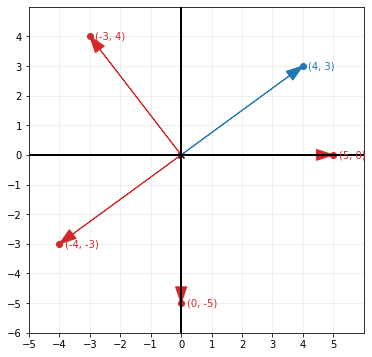

length((5, 0)) = 5.0, dot((4, 3), (5, 0)) = 20
length((-3, 4)) = 5.0, dot((4, 3), (-3, 4)) = 0
length((0, -5)) = 5.0, dot((4, 3), (0, -5)) = -15
length((-4, -3)) = 5.0, dot((4, 3), (-4, -3)) = -25


In [74]:
# 定义 u 向量和 v 向量
u = (4, 3)
v1, v2, v3, v4 = (5, 0), (-3, 4), (0, -5), (-4, -3)

# 绘制各个向量
draw(
    Points(u, color=Color.blue),
    Arrow(u, color=Color.blue),
    Points(v1, color=Color.red),
    Arrow(v1, color=Color.red),
    Points(v2, color=Color.red),
    Arrow(v2, color=Color.red),
    Points(v3, color=Color.red),
    Arrow(v3, color=Color.red),
    Points(v4, color=Color.red),
    Arrow(v4, color=Color.red),
)

# 遍历所有的 v 向量
for v in [v1, v2, v3, v4]:
    # 求向量长度
    l = length(v)
    # 求 v 向量和 u 向量的点积
    r = dot(u, v)

    # 输出向量长度和点积运算结果
    print(f"length({v}) = {l}, dot({u}, {v}) = {r}")
    
# 可以看到, 由于每个 v 向量和 u 向量的角度不同, 所以尽管 v 向量的长度均为 5, 但和 u 向量的点积结果各不相同


**练习:** 找出长度为 `3` 的向量 $u$ 和长度为 `7` 的向量 $v$, 使 $u \cdot v=21$. 再找出一对向量 $u$ 和 $v$, 使 $u \cdot v=-21$. 最后, 再找出三对长度分别为 `3` 和 `7` 的向量, 并证明它们的长度都在 `-21` 和 `21` 之间

length(u)=3.0
length(v)=7.0
dot(u,v)=21


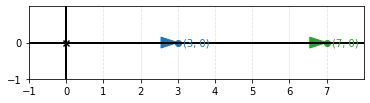

length(u)=3.0
length(v)=7.0
dot(u,v)=-21


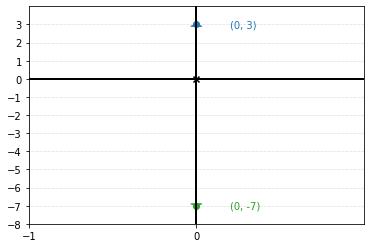

In [75]:
# 定义向量
u, v = (3, 0), (7, 0)

# 输出向量的长度
print(f"length(u)={length(u)}")
print(f"length(v)={length(v)}")
# 输出向量的点积
print(f"dot(u,v)={dot(u, v)}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Arrow(u, color=Color.blue),
    Points(v, color=Color.green),
    Arrow(v, color=Color.green),
)

# 定义向量
u, v = (0, 3), (0, -7)

# 输出向量的长度
print(f"length(u)={length(u)}")
print(f"length(v)={length(v)}")
# 输出向量的点积
print(f"dot(u,v)={dot(u, v)}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Arrow(u, color=Color.blue),
    Points(v, color=Color.green),
    Arrow(v, color=Color.green),
    nice_aspect_ratio=False,
)


In [76]:
def random_vector_of_length(l: Number) -> Vector2D:
    """
    计算指定长度的随机二维向量

    利用极坐标, 可以以向量长度和任意角度, 计算指定长度的向量

    Args:
        l (Number): 向量长度

    Returns:
        Vector2D: 二维向量
    """
    # 根据 0~1 之间的随机数, 计算 360° 内的任意弧度, 得到极坐标
    # 根据极坐标, 转换为笛卡尔坐标
    return to_cartesian((l, 2 * pi * random.random()))


u=(2.5050101024169513, 1.6507344991818083), v=(6.785786140934806, -1.7184604881978258)
  length(u)=3.0, length(v)=7.0, dot(u,v)=14.161740822533663 



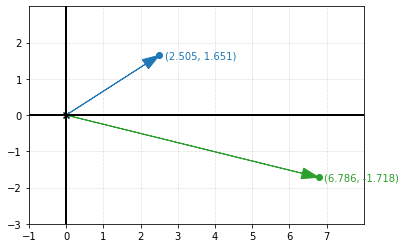

u=(2.4307664098717443, -1.7582305482044247), v=(-6.912859512950974, 1.1010782688815643)
  length(u)=3.0, length(v)=7.0, dot(u,v)=-18.739496148555187 



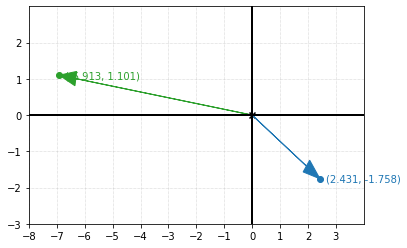

u=(2.675101183782257, -1.3578783658806732), v=(-6.722680463963014, 1.9507863490013548)
  length(u)=3.0000000000000004, length(v)=7.0, dot(u,v)=-20.632781047101595 



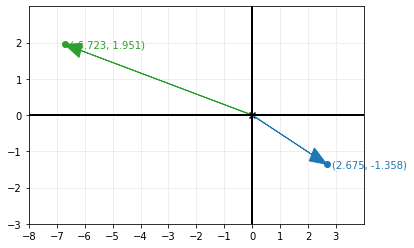

In [77]:
# 循环 3 次
for _ in range(3):
    # 生成长度为 3 的随机向量和 7 的随机向量
    u, v = random_vector_of_length(3), random_vector_of_length(7)
    
    # 输出两个向量
    print(f"u={u}, v={v}")

    # 输出向量的长度和点积
    print(
        "  "
        f"length(u)={length(u)}, "
        f"length(v)={length(v)}, "
        f"dot(u,v)={dot(u, v)}",
        "\n",
    )
    
    draw(
        Points(u, color=Color.blue),
        Arrow(u, color=Color.blue),
        Points(v, color=Color.green),
        Arrow(v, color=Color.green),
        nice_aspect_ratio=False,
    )

# 对于长度 3 和 7 的两个向量, 最大值为 21, 表示两个向量方向相同; 最小值为 -21, 表示两个向量方向相反


### 1.2. 点积和角度

**知识:** 点积是根据两个向量的夹角而变化的

具体来说, 当夹角角度为 `0` 到 `180°` 时, 点积 $u \cdot v$ 的取值范围是 $u$ 和 $v$ 长度乘积的 `1` 到 `-1` 倍. 具有这样特征的函数, 即**余弦函数**

由此可以推导点积的另一个公式: 如果 $|u|$ 和 $|v|$ 分别表示向量 $u$ 和 $v$ 的长度, 那么点积的计算公式为: $u \cdot v = |u| \cdot |v| \cdot cos(\theta)$, $\theta$ 是向量 $u$ 和 $v$ 的夹角

原则上, 这提供了一种计算点积的新方法: 通过测量两个向量的**长度**和它们之间的**角度**, 就可以得到点积的结果

**练习:** 已知向量 $u = (-1, \sqrt{3})$ 和 $v= (\sqrt{4.5}, \sqrt{4.5})$ 长度分别为 `3` 和 `2`, 且它们的夹角是 $\theta=75°$

求向量的点积和 $|u| \cdot |v|\cdot cos(\theta)$ 的值

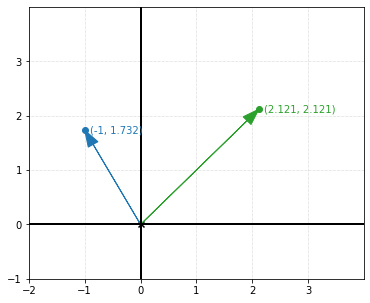

|u|=2.0, |v|=3.0, θ=1.309
|u|·|v|·cos(θ) = 1.552914270615124
dot(u, v) = 1.5529142706151244


In [78]:
# 已知两个向量 u 和 v
u, v = (-1, sqrt(3)), (sqrt(4.5), sqrt(4.5))
# 已知向量夹角为 75°, 换算为弧度
rad = to_radian(75)

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.green),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.green),
)

# 计算两个向量的长度
lu, lv = length(u), length(v)
print(f"|u|={round(lu, 3)}, |v|={round(lv, 3)}, θ={round(rad, 3)}")

# 计算向量长度的乘积和向量夹角的余弦值乘积
r1 = lu * lv * cos(rad)
print(f"|u|·|v|·cos(θ) = {r1}")

# 计算两个向量的点积
r2 = dot(u, v)
print(f"dot(u, v) = {r2}")


**练习:** 设 $u$ 和 $v$ 是向量, 其中 $|u|=3.61$, $|v|=1.44$. 如果 $u$ 和 $v$ 的夹角是 `101.3°`, 那么 $u \cdot v$ 是什么?

In [79]:
# 定义两个向量的长度
lu, lv = 3.61, 1.44
# 定义两个向量的角度
degree = 101.3

# 计算向量的点积
r = lu * lv * cos(to_radian(degree))
print(f"dot(u,v)={r}")


dot(u,v)=-1.0186064362303033


**知识:** 通过向量长度和向量夹角的角度即可计算点积, 反之, 通过向量点积和向量长度也可以求出两个向量的夹角

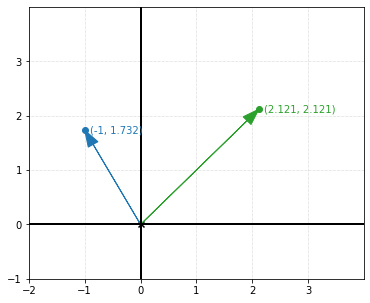

θ=75.0°


In [80]:
# 已知两个向量 u 和 v
u, v = (-1, sqrt(3)), (sqrt(4.5), sqrt(4.5))

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.green),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.green),
)

# 求两个向量的点积
ruv = dot(u, v)
# 求两个向量长度的乘积
luv = length(u) * length(v)

# 获取两个向量夹角的弧度
rad = acos(ruv / luv)
# 将夹角弧度转为角度
degree = to_degree(rad)

# 输出角度
print(f"θ={degree}°")


**知识:** 计算两个向量的夹角

In [81]:
def angle_between(v1: Vector, v2: Vector) -> float:
    """
    计算两个向量的夹角

    Args:
        v1 (Vector): 向量 1
        v2 (Vector): 向量 2

    Returns:
        float: 向量夹角的弧度
    """
    return acos(
        dot(v1, v2) / (length(v1) * length(v2)),
    )


**练习:** 计算 $u = (1, 2, 2)$ 和 $v = (2, 2, 1)$ 的向量夹角

向量夹角的计算不仅针对于二维向量有效, 实际上对 `N` 维向量也是有效的 (例如对于三维向量)

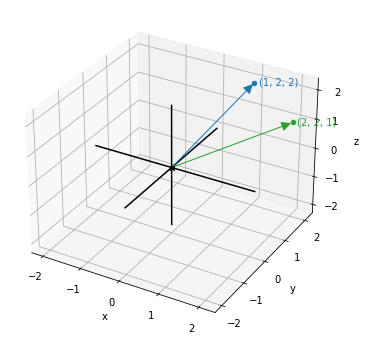

rad=0.5, θ=27.3


In [82]:
# 定义两个三维向量
u, v = (1, 2, 2), (2, 2, 1)

# 绘制三维向量
draw3d(
    Points3D(u, color=Color.blue),
    Arrow3D(u, color=Color.blue),
    Points3D(v, color=Color.green),
    Arrow3D(v, color=Color.green),
)

# 计算两个向量夹角的弧度
rad = angle_between(u, v)
# 弧度转角度
degree = to_degree(rad)
# 输出向量夹角的弧度和角度
print(f"rad={round(rad, 1)}, θ={round(degree, 1)}")


**练习:** `(1, 1, 1)` 与 `(-1, -1, 1)` 之间的角是多少度

In [83]:
# 定义两个向量
u, v = (1, 1, 1), (-1, -1, 1)

# 计算向量的夹角角度
print(f"degree={round(to_degree(angle_between(u, v)), 3)}")


degree=109.471


**练习:** 通过把 `(3, 4)` 和 `(4, 3)` 转换为极坐标并取角的差值, 来求出它们之间的角度

In [88]:
# 定义两个向量
u, v = (3, 4), (4, 3)

# 将向量从笛卡尔坐标转为极坐标
pu = to_polar(u)
pv = to_polar(v)

# 输出极坐标角度差, 即为两个向量的夹角
print(f"{pu[1] - pv[1]}")

# 计算两个向量的夹角
print(f"{angle_between(u, v)}")

0.2837941092083278
0.283794109208328
